# Preparation
Import TensorFlow library and the [Boston housing dataset](https://keras.io/api/datasets/boston_housing/) by running the cells below. In this quest, we will be predicting house prices based on various features. For this purose, we will build a very basic neural network. In the later quests, you will build upon this framework and extend it with new methods, better suited for achieving better results with the current task as well as running more complex ones.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras

boston_housing = tf.keras.datasets.boston_housing

# Tasks

From the dataset, extract training and testing features and labels.

In [ ]:
# your code
#this reads the data and split it into 4 arrays
data = boston_housing.load_data(test_split=0.2)
data[0][0].shape, data[0][1].shape, data[1][0].shape, data[1][1].shape

57344/57026 [==============================] - 0s 0us/step


((404, 13), (404,), (102, 13), (102,))

In [ ]:
import numpy as np

X_train = data[0][0]
y_train = data[0][1]
X_test = data[1][0]
y_test = data[1][1]

y_train = np.reshape(y_train, (y_train.shape[0],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))

print('Shape of training data:    ', X_train.shape)
print('Shape of training labels:  ', y_train.shape)
print('Shape of test data:        ', X_test.shape)
print('Shape of test labels:      ', y_test.shape)

Shape of training data:     (404, 13)
Shape of training labels:   (404, 1)
Shape of test data:         (102, 13)
Shape of test labels:       (102, 1)


In [ ]:
X_train.shape[1], y_train.shape[1]

(13, 1)

Build a very simple sequential model with three [dense](https://medium.com/datathings/dense-layers-explained-in-a-simple-way-62fe1db0ed75) layers - one input layer for the features, one hidden layer and one output layer for the price prediction. Equip the hidden layers with 64 neurons. How many nodes does the output layer need? An what activation function? Make the input and the hidden layer use [ReLu](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/) as your activation function.

In [ ]:
# your code
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

#this is the first model with one input layer, one hidden layer and the output layer

def first_model():
    model = Sequential()
    # first hidden layer, defines also the input layer
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_initializer=keras.initializers.he_normal(seed=42),\
                    bias_initializer='zeros'))
    # output layer
    model.add(Dense(y_train.shape[1], activation='linear', kernel_initializer=keras.initializers.he_normal(seed=42),\
                    bias_initializer='zeros'))
    return model


In [ ]:
#this is an other model with one input layer, two hidden layers and the output layer

def second_model():
    model = Sequential()
    # first hidden layer, defines also the input layer
    model.add(Dense(8, input_dim=X_train.shape[1], activation='relu', kernel_initializer=keras.initializers.he_normal(seed=42),\
                    bias_initializer='zeros'))
    # second hidden layer
    model.add(Dense(24, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=42),\
                    bias_initializer='zeros'))
    # output layer
    model.add(Dense(y_train.shape[1], activation='linear', kernel_initializer=keras.initializers.he_normal(seed=42),\
                    bias_initializer='zeros'))
    return model

Print the model summary to get an overview of it in the cell below.

In [ ]:
# your code
#model = first_model()
model = second_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 112       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                216       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25        
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


Now, compile your model. For the sake of simplicity, use Mean Squared Error both as loss function and as metrics. For optimization, use [Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/#:~:text=Adam%20is%20an%20optimization%20algorithm,iterative%20based%20in%20training%20data.&text=The%20algorithm%20is%20called%20Adam.).

In [ ]:
from tensorflow.keras.optimizers import Adam
# your code
model.compile( loss='mse', optimizer='adam', metrics=['mse'])

Fit the model on the train data. 1000 epochs should be more than enough. 

In [ ]:
# your code
History = model.fit(X_train, y_train, epochs=750, batch_size=32, validation_split=0.2, verbose=0)

Finally, evaluate your model on the test data and get the score.

In [ ]:
# your code:
loss, mse = model.evaluate(X_test, y_test, verbose=1)
print('MSE: %.4f' % (mse))

4/4 [==============================] - 0s 3ms/step - loss: 29.5850 - mse: 29.5850
MSE: 29.5850


Further suggestions: 

Plot the loss on the training AND validation set for each epoch

What does this tell you about your model? 

Try out different hyperparameters, i.e. reduce the number of neurons in your hidden layers - or increase them, add more hidden layers, add some regularization, i.e. L2-regularization or dropout

In [ ]:
History.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

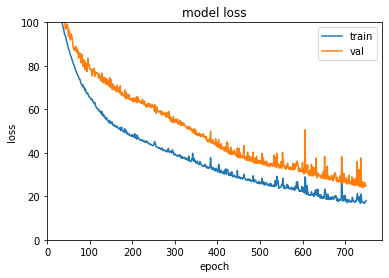

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.xlim(0)
plt.ylim(0,100)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

#this is a try to see the updates in github

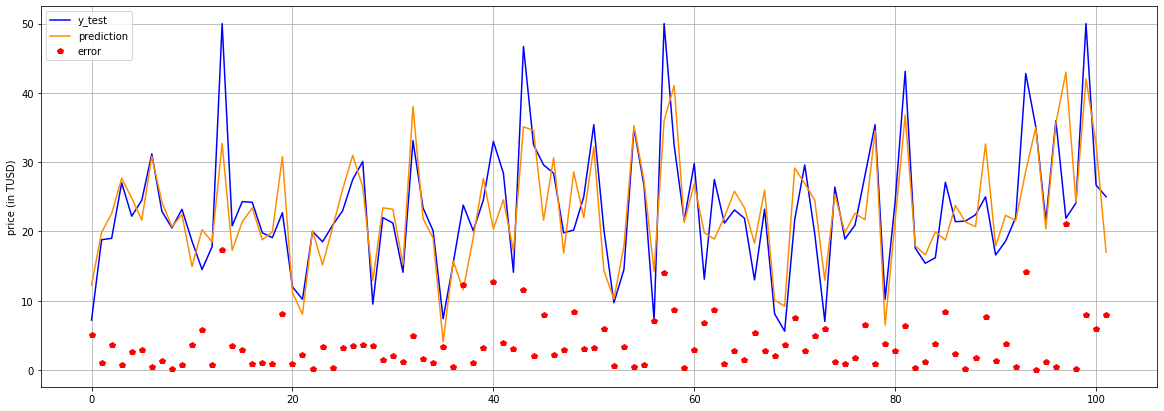

3.8124237845925726

In [ ]:


predict = model.predict(X_test)
error = abs(y_test - predict)

plt.figure(figsize= (20,7))
plt.grid(True)
plt.plot(y_test, 'b', label='y_test')
plt.plot(predict, 'darkorange', label='prediction')
plt.plot(error, 'rp',label='error')
plt.legend()
plt.ylabel('price (in TUSD)')

plt.show()
error.mean()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a109ea11-a7da-42aa-8af0-3a0cdafc917e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>